# Seaborn
-matplotlib의 성능 및 디자인을 업그레이드
-DataFrame을 대상으로 시각화 한다.
-https://seaborn.pydata.org

# 실습 데이터셋 확인

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [20]:
import warnings
warnings.filterwarnings(action='ignore')

In [18]:
# seaborn 데이터셋 위치 : https://github.com/mwaskom/seaborn-data
df = sns.load_dataset('mpg')
print(type(df))
display(df.head()) # 상위 5개보여줘
print(df.shape)

<class 'pandas.core.frame.DataFrame'>


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


(398, 9)


# 관계형 그래프

## relplot()
- 변수간의 상관성을 시각화 하는 그래프
- 매개변수 kind = 'scatter', kind = 'line' 을 통해서 그래프의 종류를 선택할 수 있다. (기본값: scatter)
- hue 매개변수를 통해 범주형 데이터의 종류별 포인트 색깔을 다르게 지정할 수 있다.

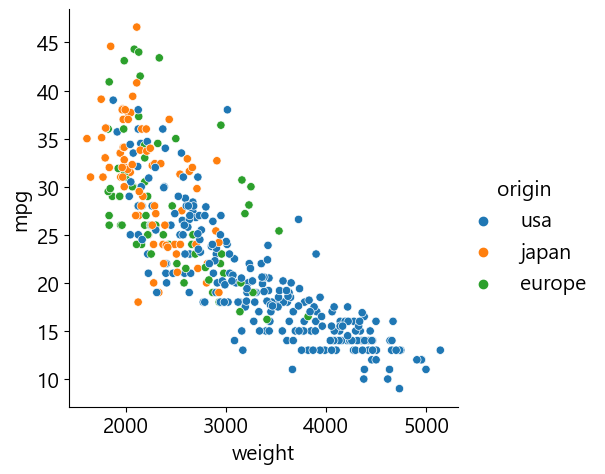

In [21]:
sns.relplot(data=df, x = 'weight', y='mpg', hue='origin') #자동차의 무게와 연비의 관계보고싶어
plt.show()

- col 매개변수에 범주형 컬럼을 지정하여 해당 컬럼의 범주 값 만큼 그래프를 분할하여 그려준다.

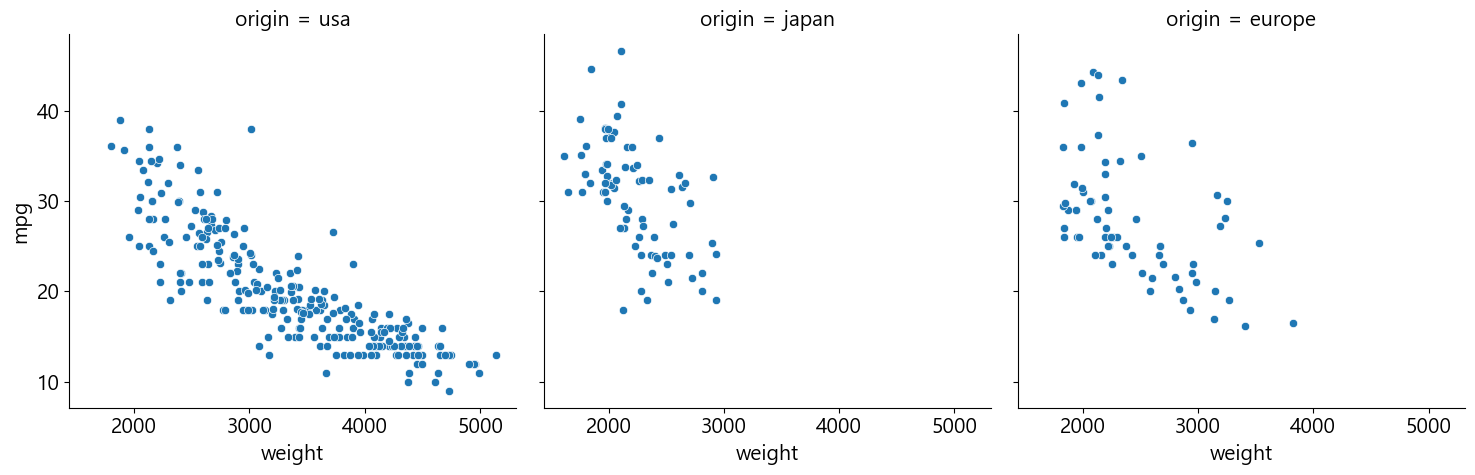

In [22]:
sns.relplot(data=df, x='weight', y = 'mpg', col = 'origin')
plt.show()

## regplot()
- **선형회귀선**을 추가적으로 그려준다.
- 회귀선의 음영 영역은 회귀 추정에 대한 신뢰구간을 보여준다.

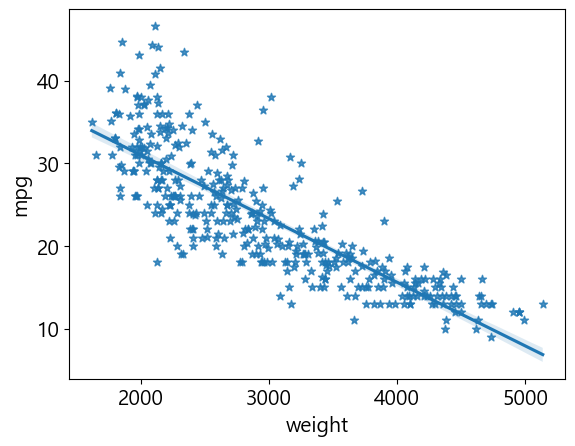

In [25]:
sns.regplot(data=df, x= 'weight', y='mpg', marker ='*')
plt.show()

## pairplot()
- 각 변수들의 분포와 모든 변수들 간의 분포 관계를 보여준다. (시간이 오래 걸린댕)
- vars 매개변수에 보고싶은 컬럼명을 리스트로 전달하여 원하는 컬럼만 추출해서 그릴 수 있다.

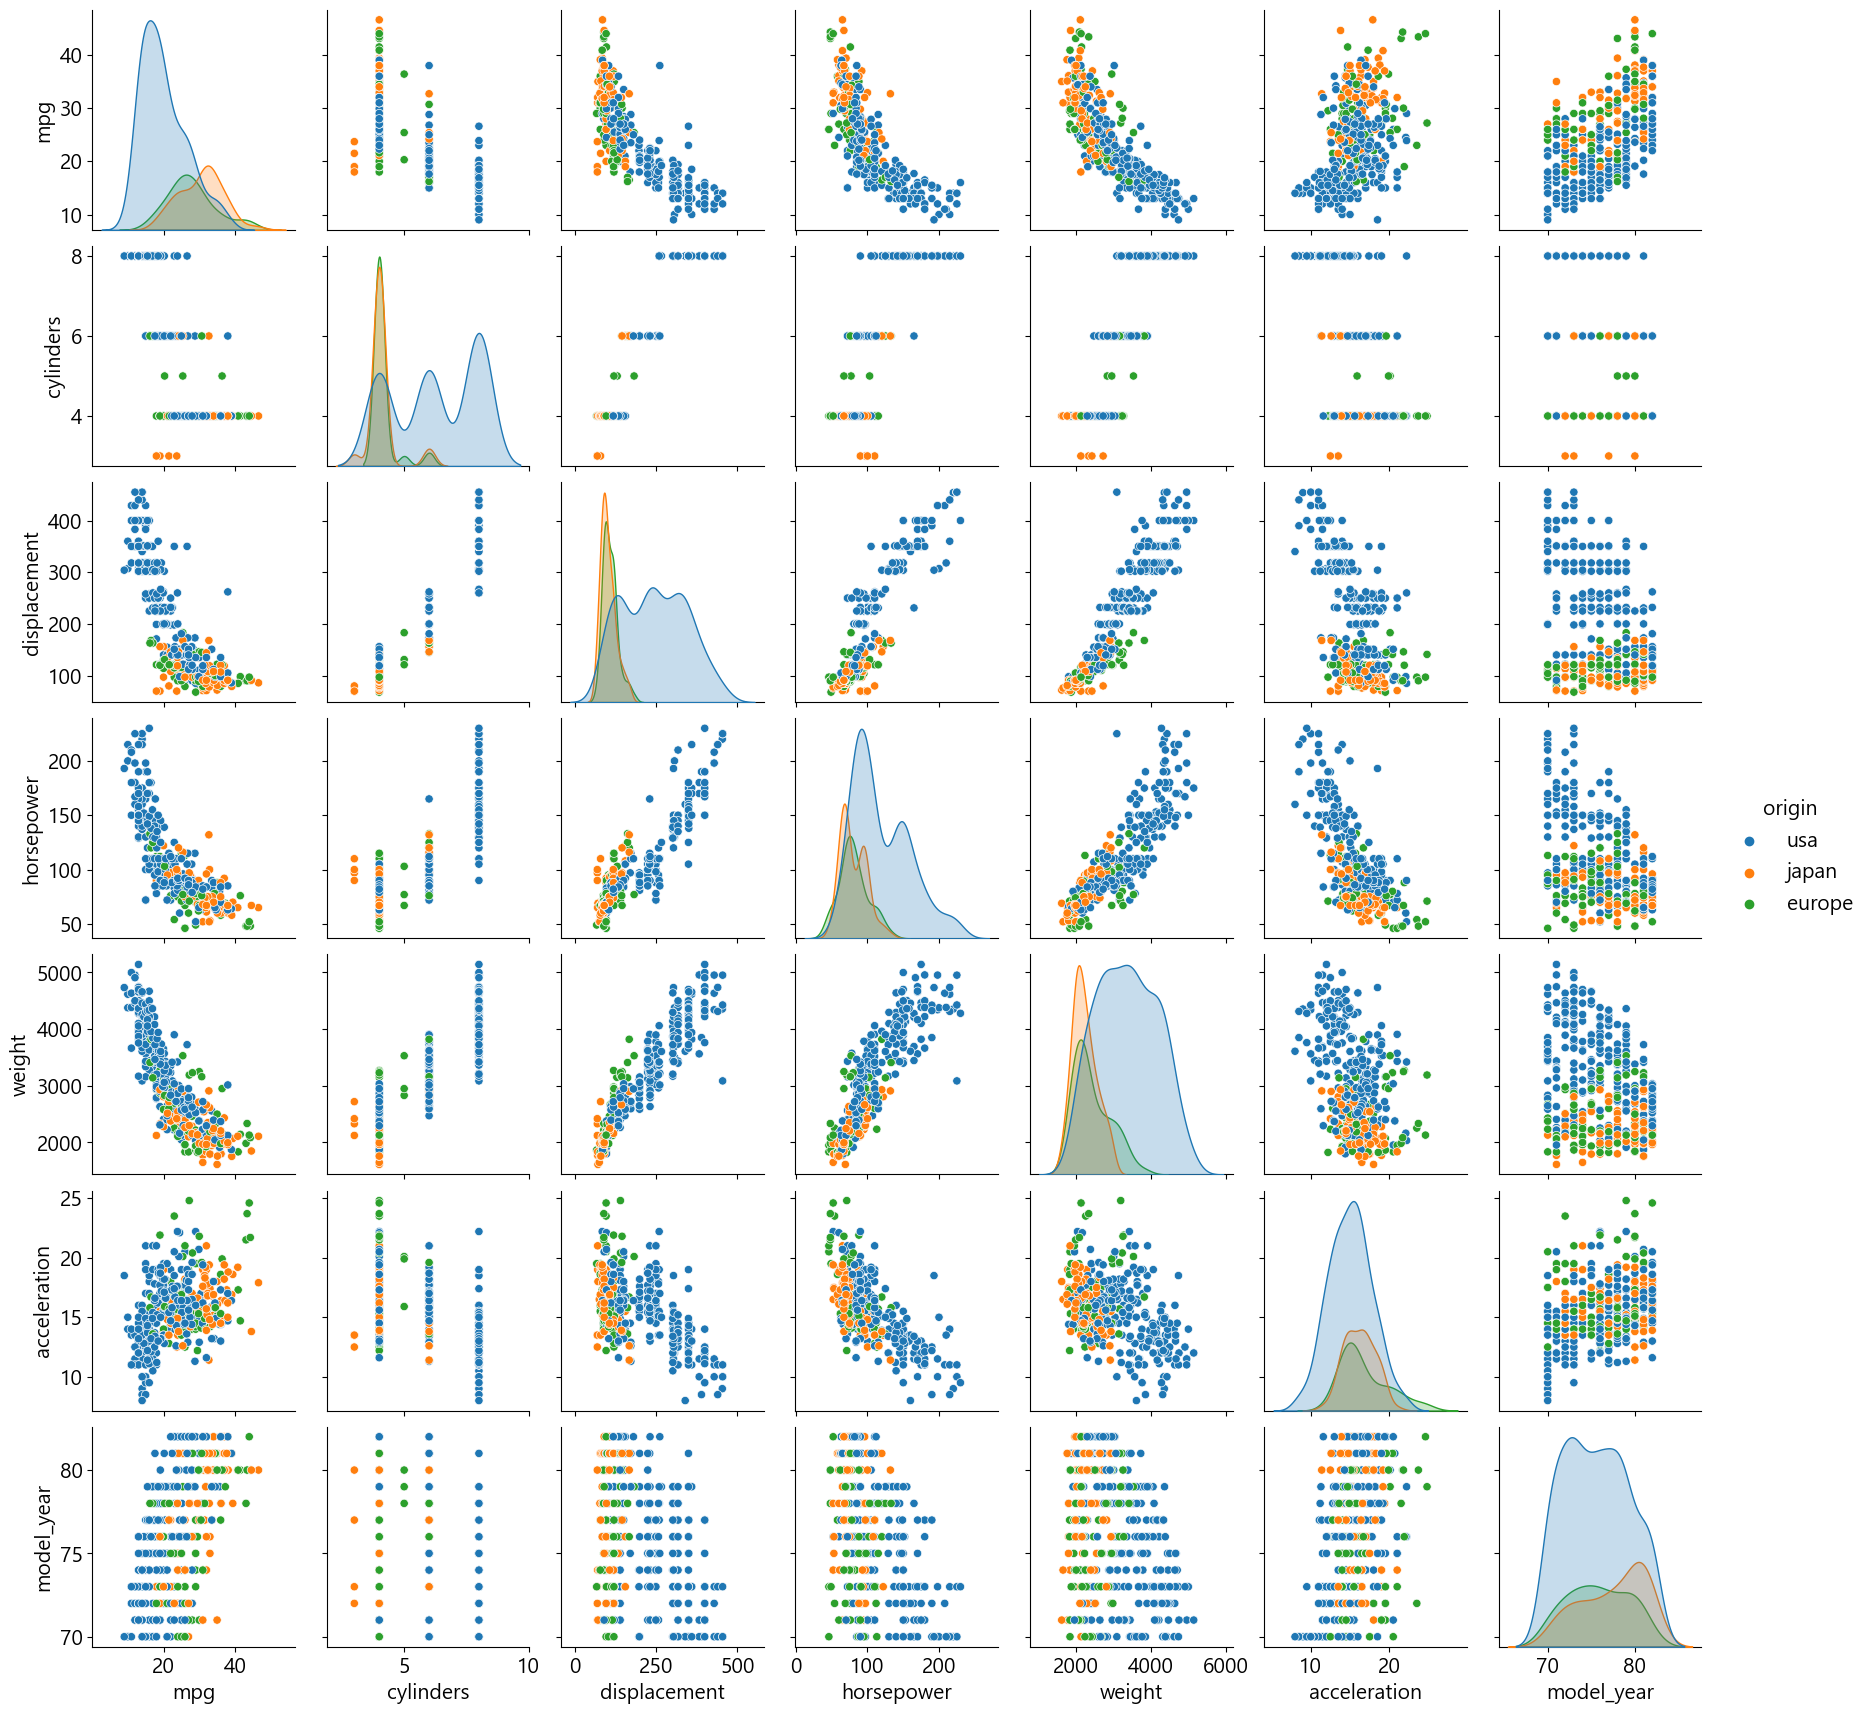

In [31]:
sns.pairplot (data=df,hue='origin')
plt.show()

## lineplot()
- 연속형 데이터들에 대한 관계를 선으로 보여주는 그래프
- 같은 x값에 여러 개의 y값을 갖는 경우에는 각 x값에 대한 평균과 95%의 신뢰구간을 평균위주로 표시한다.

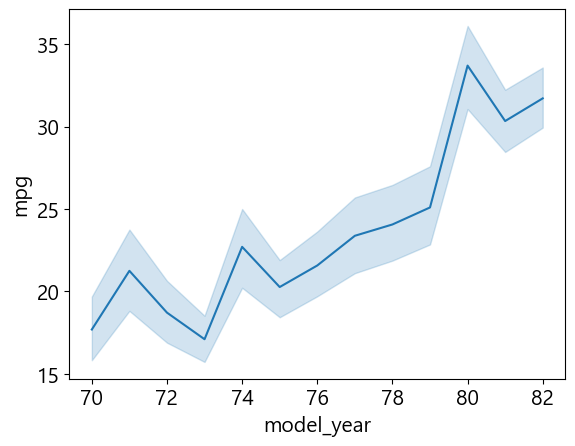

In [32]:
sns.lineplot(data=df, x='model_year', y = 'mpg')
plt.show()

In [35]:
df[df['model_year'] == 70]['mpg'].mean()

17.689655172413794

## heatmap()
- 데이터의 상관관계 정도에 따라 색차이를 부여한 그래프

In [36]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
iris_data = iris.drop('species',axis=1)
iris_data.head()
corr = iris_data.corr()
corr # 변수들 간의 상호관계를 지표화하여 가져옴

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

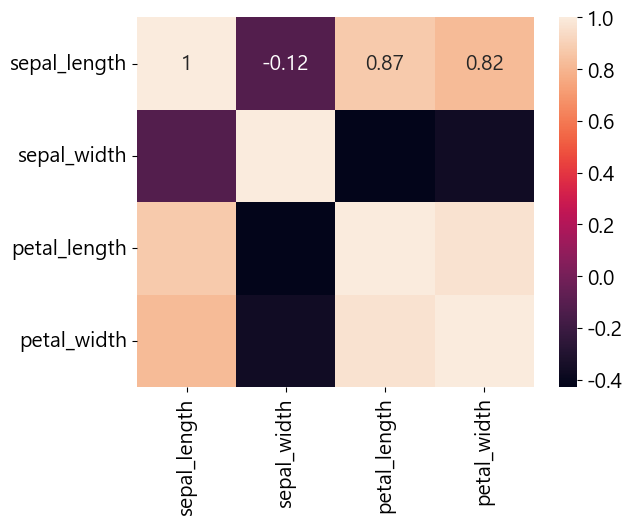

In [42]:
sns.heatmap(corr, annot=True)

# 분포형 그래프

In [ ]:
## displot()
- kde: True/False 값, 밀도를 추정할 수 있다.
- bins : 최소, 최대값 사이 몇 개의 칸으로 나눠서 그릴지 지정

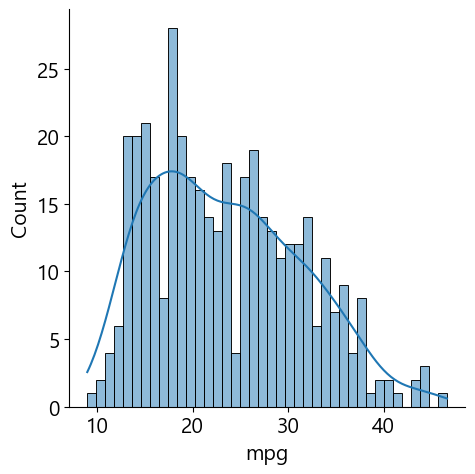

In [43]:
sns.displot(data=df, x ='mpg', kde=True, bins = 40)
plt.show()

# y파라메터만 지정하면 수평 히스토그램을 그린다.

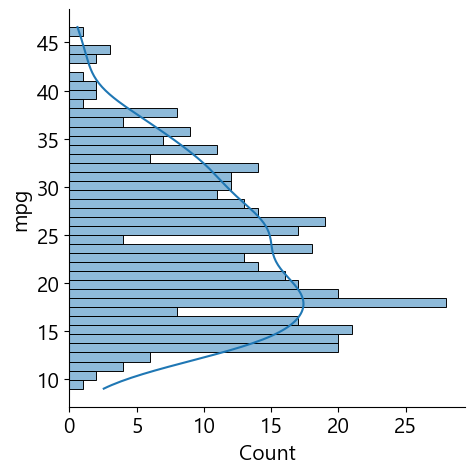

In [44]:
sns.displot(data=df, y = 'mpg', kde=True, bins = 40)
plt.show()

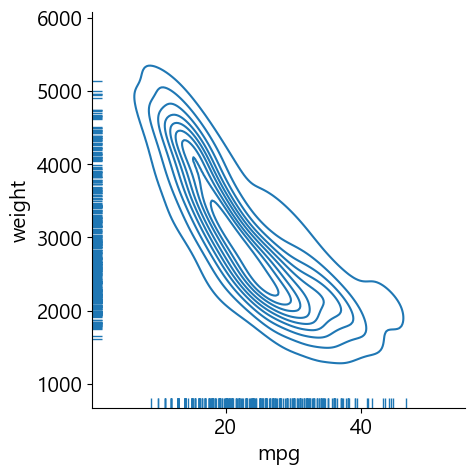

In [45]:
sns.displot(data=df, x='mpg',y='weight',kind='kde',rug='True')
plt.show()

## barplot()
- x축에는 범주형 변수, y축에는 연속형 변수를 입력(두 변수의 위치를 바꾸면 수평 막대그래프를 그린다.)
- estimator : 평균(기본값, np.mean), 합(np.sum), 카운트(len), 중앙값(np.median), 표준편차(np.std)

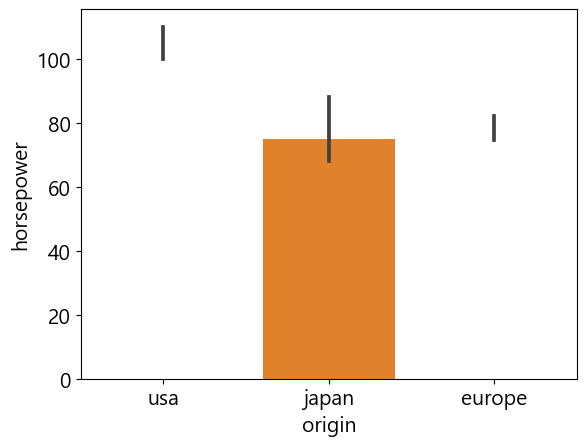

In [53]:
import numpy as np
sns.barplot(data=df, x = 'origin', y='horsepower', estimator=np.median)
plt.show()

In [49]:
df[df['origin']=='usa']['horsepower'].describe()

count    245.00000
mean     119.04898
std       39.89779
min       52.00000
25%       88.00000
50%      105.00000
75%      150.00000
max      230.00000
Name: horsepower, dtype: float64

## boxplot()

In [55]:
df_origin = df.groupby('origin')['mpg'].describe()
df_origin

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


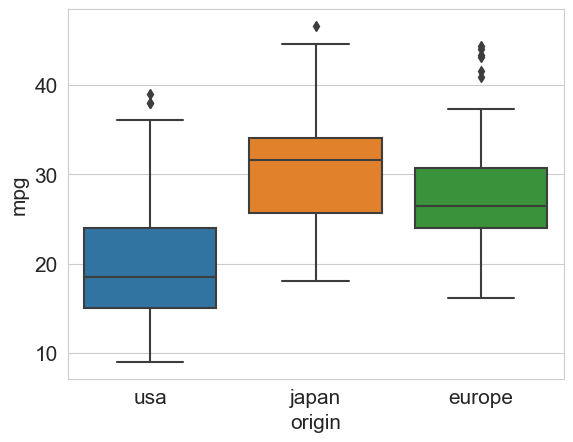

In [57]:
sns.set_style('whitegrid')
sns.boxplot(data=df, x = 'origin', y = 'mpg')
plt.show()

## violinplot()
- 데이터의 분포에 따라 통통하고 홀쭉하게 표현한 모습이 바이올린을 닮은 그래프
- boxplot은 이상치를 파악할떄 유리하고, violinplot은 데이터의 분포를 파악할때 유리하다

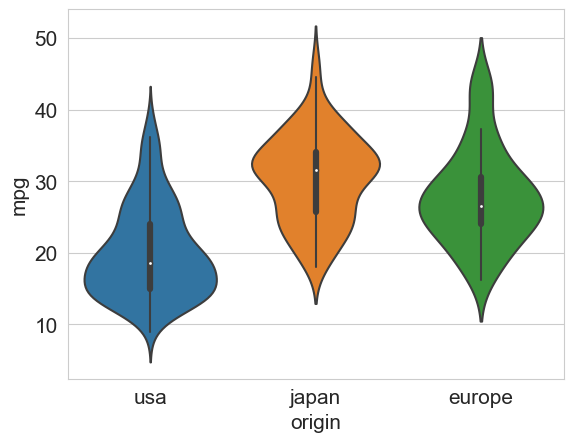

In [58]:
sns.violinplot(data=df, x = 'origin', y = 'mpg')
plt.show()